# Common Libraries

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# Logistic Regression

In [8]:
#import the dataset

social_network = pd.read_csv("/content/drive/MyDrive/machine learning/datasets/SocialNetworkAds.csv")
X = social_network.iloc[:,[2,3]].values #Extracting the Independent Variables
y = social_network.iloc[:,4].values #Extracting the dependent/target Variable

In [9]:
social_network

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


<ipython-input-10-5e4e21d8fb9b>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(social_network.corr())


<Axes: >

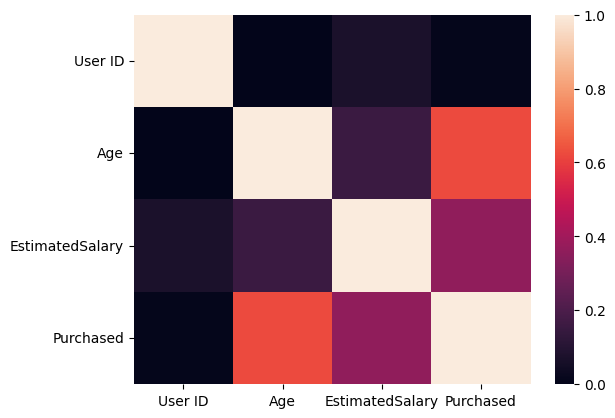

In [10]:
#Visulizing the Dataset
sns.heatmap(social_network.corr())

In [11]:
#spliting the dataset into the training set and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [12]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train= sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)


In [13]:
#Fit simple linear regression to the training set
from sklearn.linear_model import LogisticRegression
logR=LogisticRegression(random_state=0)
logR.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [14]:
#predict the test set results
y_pred = logR.predict(X_test)

In [20]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)*100

89.0

<ipython-input-15-125defaf9d70>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set ==j,0], X_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)


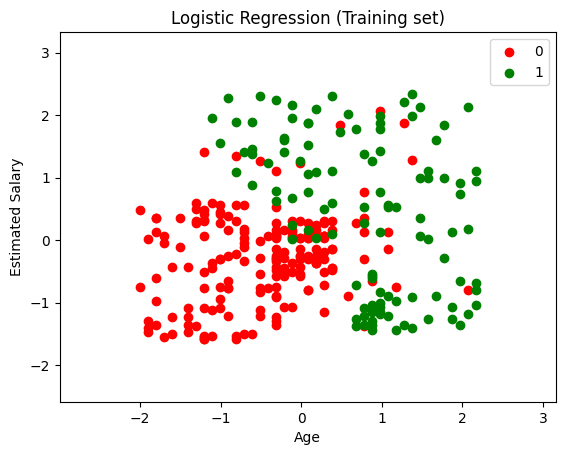

In [15]:
#visulizing the training set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop =X_set[:,0].max()+1, step =0.01),np.arange(start = X_set[:,1].min()-1, stop =X_set[:,1].max()+1, step =0.01))
#plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T.reshape(592,616,-1),alpha = 0.75, cmap=ListedColormap('red','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0], X_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title("Logistic Regression (Training set)")
plt.xlabel('Age')
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()



<ipython-input-16-143304e13062>:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set ==j,0], X_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)


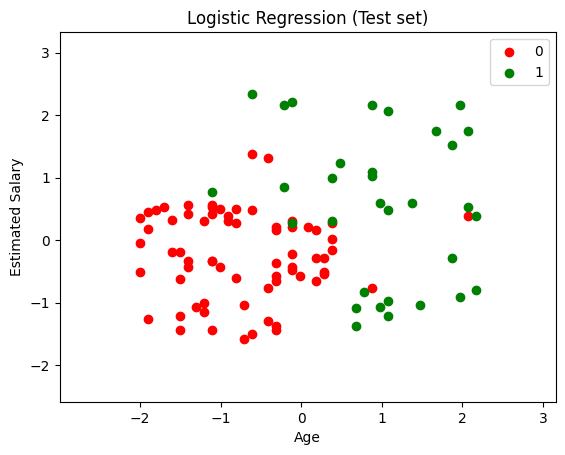

In [16]:
#visulizing the test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:,0].min()-1, stop =X_set[:,0].max()+1, step =0.01),np.arange(start = X_set[:,1].min()-1, stop =X_set[:,1].max()+1, step =0.01))
#plt.contourf(X1,X2,classifier.predict(np.array([X1.ravel(),X2.ravel()]).T.reshape(592,616,-1),alpha = 0.75, cmap=ListedColormap('red','green')))

plt.xlim(X1.min(),X1.max())
plt.ylim(X2.min(),X2.max())
for i,j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set ==j,0], X_set[y_set==j,1],c=ListedColormap(('red','green'))(i),label=j)
plt.title("Logistic Regression (Test set)")
plt.xlabel('Age')
plt.ylabel("Estimated Salary")
plt.legend()
plt.show()

In [17]:
#Confusion matrix Evaluation
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm


array([[65,  3],
       [ 8, 24]])

In [18]:
#Testing of Prediction
out = logR.predict([[10,0]])
out

array([1])